# Practice and play with some data, data cleaning, and basic machine learning:


In [1]:
# Generate some clustered data (blobs!)
import numpy as np
# need sklearn/scipy/etc?:  pip install -U numpy scipy scikit-learn
from sklearn.datasets.samples_generator import make_blobs
n_samples=5000
X, y = make_blobs(n_samples, centers=4, n_features=2,
                  random_state=0)

## Here is our data that we will be playing with

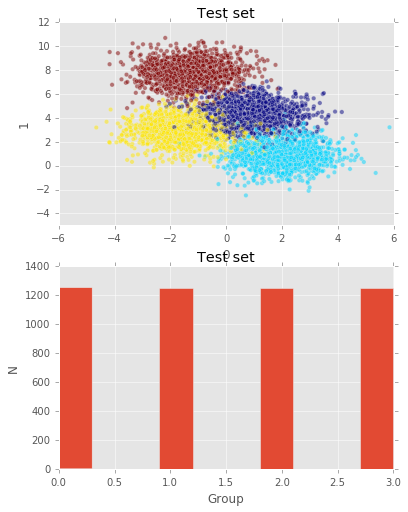

In [16]:
# PLOT imported data:
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.figure(figsize=(6,8));
plt.subplot(2, 1, 1 );
plt.scatter(X[:,0] , X[:,1],  c = y, alpha = 0.5);
plt.title('Test set')
plt.xlabel('0')
plt.ylabel('1')
plt.xlim(-6,6)
plt.ylim(-5,12)

plt.subplot(2, 1, 2);
plt.hist(y)
plt.title('Distribution per group')
plt.title('Test set')
plt.xlabel('Group')
plt.ylabel('N')
plt.show()


# Make histograms of predictor variables

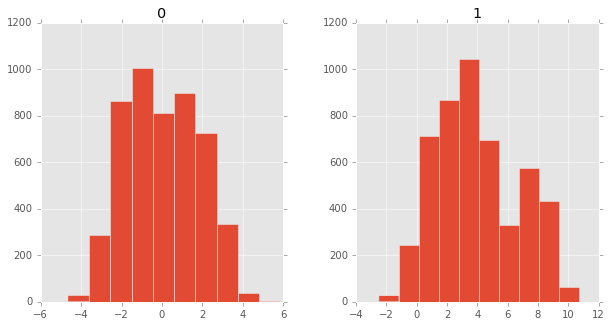

In [8]:
# need pandas?: pip install pandas
import pandas as pd
df = pd.DataFrame(X)
pd.DataFrame.hist(df, figsize=(10,5));


# training and testing data (split data into groups:)


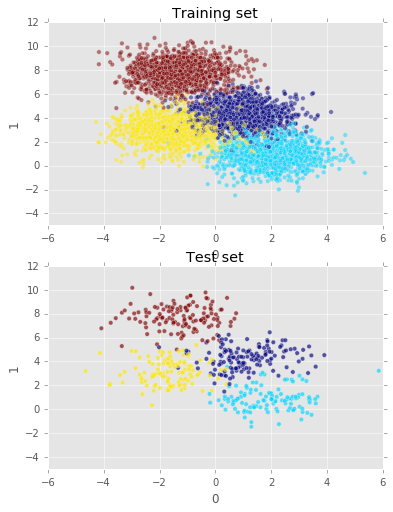

In [15]:

from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1, random_state=42)

plt.figure(figsize=(6,8));
plt.subplot(2, 1, 1 );
plt.title('Training set')
plt.xlabel('0')
plt.ylabel('1')
plt.scatter(X_train[:,0] , X_train[:,1],  c = y_train, alpha = 0.5);
plt.xlim(-6,6)
plt.ylim(-5,12)

plt.subplot(2, 1, 2);
plt.scatter(X_test[:,0] , X_test[:,1],  c = y_test, alpha = 0.65);
plt.title('Test set')
plt.xlabel('0')
plt.ylabel('1')
plt.xlim(-6,6)
plt.ylim(-5,12)
plt.show()

In [17]:
#k-Nearest Neighbors voting classifier and train it on our training set:
from sklearn import neighbors, linear_model
knn = neighbors.KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)

'''how accurate??'''
# how good was test data? [accuracy]
print('k-NN score for test set: %f' % knn_model.score(X_test, y_test))

# any better using training data (should be)? [accuracy]
print('k-NN score for training set: %f' % knn_model.score(X_train, y_train))

'''other metrics'''
from sklearn.metrics import classification_report
y_true, y_pred = y_test, knn_model.predict(X_test)
print(classification_report(y_true, y_pred))

k-NN score for test set: 0.920000
k-NN score for training set: 0.938222
             precision    recall  f1-score   support

          0       0.89      0.86      0.87       139
          1       0.94      0.96      0.95       115
          2       0.86      0.94      0.90       116
          3       0.99      0.94      0.96       130

avg / total       0.92      0.92      0.92       500



## Lets scale our data and then add some noise

k-NN score for test set: 0.918000


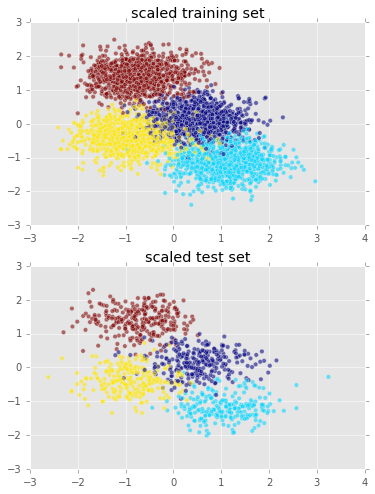

In [18]:
from sklearn.preprocessing import scale
Xs = scale(X)
Xs_train, Xs_test, y_train, y_test = train_test_split(Xs, y, test_size=0.2, random_state=42)

plt.figure(figsize=(6,8));
plt.subplot(2, 1, 1 );
plt.scatter(Xs_train[:,0] , Xs_train[:,1],  c = y_train, alpha = 0.57);
plt.title('scaled training set')
plt.subplot(2, 1, 2);
plt.scatter(Xs_test[:,0] , Xs_test[:,1],  c = y_test, alpha = 0.57);
plt.title('scaled test set')

knn_model_s = knn.fit(Xs_train, y_train)
print('k-NN score for test set: %f' % knn_model_s.score(Xs_test, y_test))




# Now, we can put it all together:

k-NN score for test set: 0.921000
k-NN score for test set (noisey): 0.519000
k-NN score for test set (scaled/noisey data): 0.923000


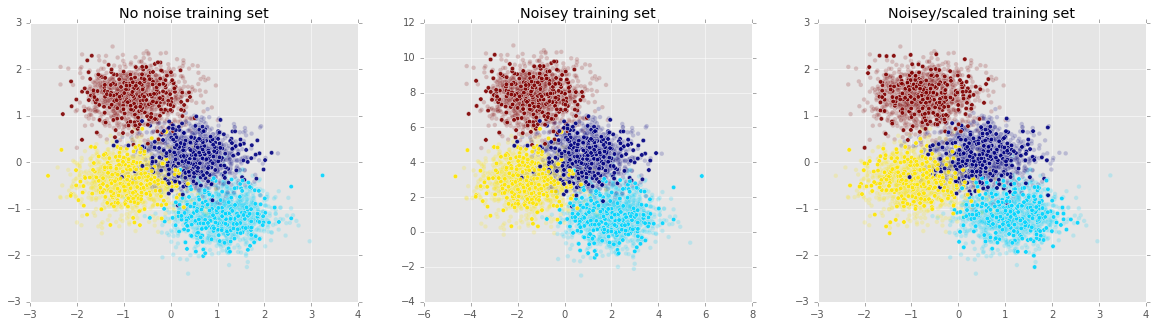

In [19]:
#=======================================
#1. data
X, y = make_blobs(n_samples, centers=4, n_features=2,
                  random_state=0)

from sklearn.cross_validation import train_test_split
from sklearn import neighbors, linear_model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

knn = neighbors.KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)

'''how accurate??'''
# how good was test data? [accuracy]
print('k-NN score for test set: %f' % knn_model.score(X_test, y_test))


#=======================================
#2. add noise to predictor variables
X, y = make_blobs(n_samples, centers=4, n_features=2,
                  random_state=0)

ns = 10**(3) # Strength of noise term
newcol = np.transpose([ns*np.random.randn(n_samples)])
Xn = np.concatenate((X, newcol), axis = 1)

#from mpl_toolkits.mplot3d import Axes3D
#fig = plt.figure(figsize=(15,10));
#ax = fig.add_subplot(111, projection='3d' , alpha = 0.5);
#ax.scatter(Xn[:,0], Xn[:,1], Xn[:,2], c = y);

#retrain noisey data
Xn_train, Xn_test, y_train, y_test = train_test_split(Xn, y, test_size=0.2, random_state=42)
knn = neighbors.KNeighborsClassifier()
knn_model = knn.fit(Xn_train, y_train)
print('k-NN score for test set (noisey): %f' % knn_model.score(Xn_test, y_test))

#=======================================
#3. scale and retrain noisey data
X, y = make_blobs(n_samples, centers=4, n_features=2,
                  random_state=0)

Xns = scale(Xn)
s = int(.2*n_samples)
#retrain noisey/scaled data
Xns_train = Xns[s:]
y_train3 = y[s:]
Xns_test = Xns[:s]
y_test3 = y[:s]
knn = neighbors.KNeighborsClassifier()
knn_models = knn.fit(Xns_train, y_train3)
print('k-NN score for test set (scaled/noisey data): %f' % knn_models.score(Xns_test, y_test3))

#fig = plt.figure(figsize=(15,10));
#ax = fig.add_subplot(111, projection='3d' , alpha = 0.5);
#ax.scatter(Xns[:,0], Xns[:,1], Xns[:,2], c = y);


#=======================================
plt.figure(figsize=(20,5));
plt.subplot(1, 3, 1 );
plt.scatter(Xs_train[:,0] , Xs_train[:,1],  c = y_train, alpha = 0.19);
plt.scatter(Xs_test[:,0] , Xs_test[:,1],  c = y_test, alpha = .9, marker='o');
plt.title('No noise training set')

plt.subplot(1, 3, 2);
plt.scatter(Xn[:,0] , Xn[:,1],  c = y, alpha = 0.19);
plt.scatter(Xn_test[:,0] , Xn_test[:,1],  c = y_test, alpha = 0.9, marker='o');


plt.title('Noisey training set')

plt.subplot(1, 3, 3);
plt.scatter(Xns[:,0] , Xns[:,1],  c = y, alpha = 0.19);
plt.scatter(Xns_test[:,0] , Xns_test[:,1],  c = y_test3, alpha = 0.9, marker='o');

plt.title('Noisey/scaled training set')
plt.show()


In [148]:
# regression model
# Below, change the exponent of 10 to alter the amount of noise
ns = 10**(5) # Strength of noise term
# Set sc = True if you want to scale your features
sc = False
   
#Import packages
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn import neighbors, linear_model
from sklearn.preprocessing import scale
from sklearn.datasets.samples_generator import make_blobs
   
#Generate some data
n_samples=2000
X, y = make_blobs(n_samples, centers=4, n_features=2,
                 random_state=0)

# Add noise column to predictor variables
newcol = np.transpose([ns*np.random.randn(n_samples)])
Xn = np.concatenate((X, newcol), axis = 1)

#Scale if desired
if sc == True:
	Xn = scale(Xn)
   
#Train model and test after splitting
Xn_train, Xn_test, y_train, y_test = train_test_split(Xn, y, test_size=0.2, random_state=42)
lr = linear_model.LogisticRegression()
lr_model = lr.fit(Xn_train, y_train)
print('logistic regression score for test set: %f' % lr_model.score(Xn_test, y_test))

logistic regression score for test set: 0.887500


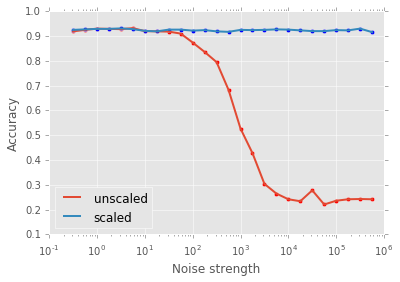

In [20]:
def accu( X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    knn = neighbors.KNeighborsClassifier()
    knn_model = knn.fit(X_train, y_train)
    return(knn_model.score(X_test, y_test))

factor = .25
noise = [10**i for i in np.arange(-2,6/factor)*factor]
A1 = np.zeros(len(noise))
A2 = np.zeros(len(noise))
count = 0
for ns in noise:
    newcol = np.transpose([ns*np.random.randn(n_samples)])
    Xn = np.concatenate((X, newcol), axis = 1)
    Xns = scale(Xn)
    A1[count] = accu( Xn, y)
    A2[count] = accu( Xns, y)
    count += 1
    
plt.scatter( noise, A1, c = 'r' )
plt.plot( noise, A1, label = 'unscaled', linewidth = 2)

plt.scatter( noise, A2 , c = 'b')
plt.plot( noise, A2 , label = 'scaled', linewidth = 2)

plt.xscale('log')
plt.xlabel('Noise strength')
plt.ylabel('Accuracy')
plt.legend(loc=3);